<h1>Interpolation</h1>
<h2>Question : </h2>
<p>Given the image “lenna.png” with dimensions 220x220 pixels, apply bilinear and nearest neighbour interpolation techniques to scale up the size of the image. After performing the interpolation, compare and contrast the visual results of the two methods in terms of smoothness, sharpness, and artifact appearance. </p>

In [3]:
# We need OpenCV library for billinear and nearest neighbour interpolation as well as for other basic operation
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load the Lenna image
'''
Syntax: cv2.imread(path, flag)


Parameters:
path: A string representing the path of the image to be read.
flag: It specifies the way in which image should be read. It’s default value is cv2.IMREAD_COLOR (Default - BGR)

cv2.IMREAD_COLOR: It specifies to load a color image. Any transparency of image will be neglected. It is the default flag. Alternatively, we can pass integer value 1 for this flag.
cv2.IMREAD_GRAYSCALE: It specifies to load an image in grayscale mode. Alternatively, we can pass integer value 0 for this flag.
cv2.IMREAD_UNCHANGED: It specifies to load an image as such including alpha channel. Alternatively, we can pass integer value -1 for this flag.

Basically speaking, IMREAD_UNCHANGED flag of imread mode allows us to read transparent images



Return Value: This method returns an image that is loaded from the specified file.
'''

image_path = "Lenna.png"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

In [5]:
# Define the scaling factor
scale_factor = 2  # Scaling up by 8x

'''
Scaling is just resizing of the image. OpenCV comes with a function cv.resize() for this purpose.
The size of the image can be specified manually, or you can specify the scaling factor. Different interpolation methods are used. 
Preferable interpolation methods are cv.INTER_AREA for shrinking and cv.INTER_CUBIC (slow) & cv.INTER_LINEAR for zooming. 
By default, the interpolation method cv.INTER_LINEAR is used for all resizing purposes. 
You can resize an input image with either of following methods:

import numpy as np
import cv2 as cv
 
img = cv.imread('messi5.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
 
res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)
 
#OR
 
height, width = img.shape[:2]
res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)
'''

height, width = image.shape[:2]

# Apply Nearest Neighbor Interpolation
nearest_neighbor = cv2.resize(image, (width * scale_factor, height * scale_factor), interpolation=cv2.INTER_NEAREST)

# Apply Bilinear Interpolation (Same as linear interpolation in each dimension)
bilinear = cv2.resize(image, (width * scale_factor, height * scale_factor), interpolation=cv2.INTER_LINEAR)


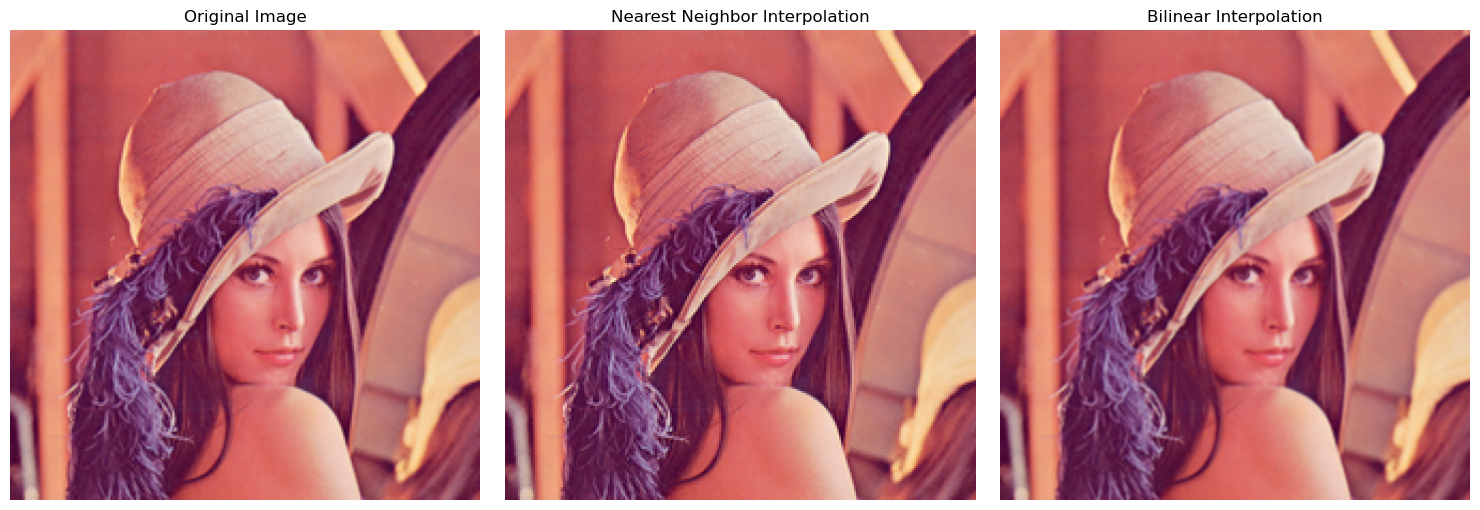

In [6]:
# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(nearest_neighbor)
axes[1].set_title("Nearest Neighbor Interpolation")
axes[1].axis("off")

axes[2].imshow(bilinear)
axes[2].set_title("Bilinear Interpolation")
axes[2].axis("off")

plt.tight_layout()
plt.show()


<h2>Comparison of Nearest Neighbor vs. Bilinear Interpolation on Lenna Image </h2><br>
<h3>Nearest Neighbor Interpolation:</h3>

<ul>
    <li>Sharpness: Retains sharp edges but produces blocky artifacts.</li>
    <li>Smoothness: Poor; visible jagged edges.</li>
    <li>Artifacts: Pixelation and staircase effects on curves and diagonal lines.</li>
</ul>



<h3>Bilinear Interpolation:</h3>

<ul>
    <li>Sharpness: Slightly reduced compared to nearest neighbor due to blending.</li>
    <li>Smoothness: Improved; color transitions are gradual.</li>
    <li>Artifacts: Minimal, but slight blurring occurs.</li>
</ul>

<h3>Conclusion:</h3>
<ul>
    <li>Nearest Neighbor is best for preserving individual pixel details (useful in pixel art, low-resolution graphics).</li>
    <li>Bilinear Interpolation provides a smoother and more natural appearance, making it preferable for general image scaling.</li>
</ul>

